1.  As shown in the Figure 1 of the paper, the structure of the neural network is indeed just a deep network using $(N+2)T$ layers successively with dense connection between each layer.
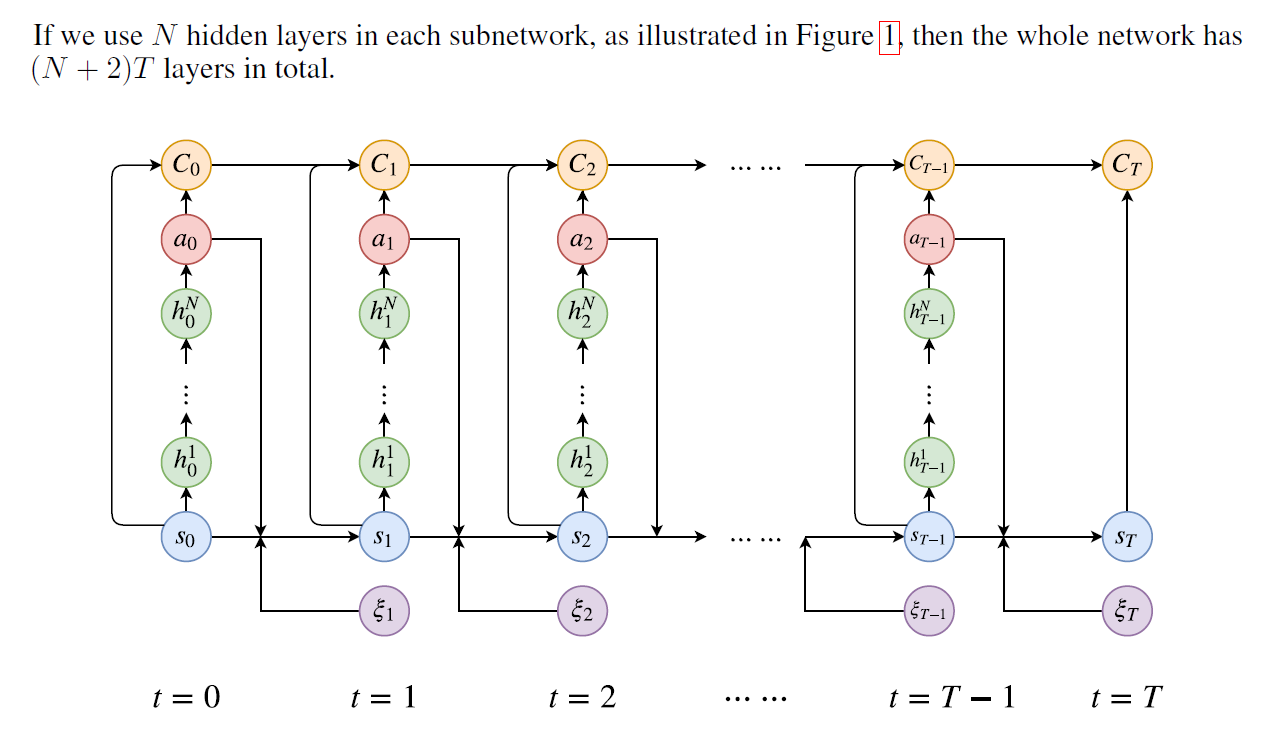
I think we can simply define a sequential model with the keras library of Tensorflow 2. And I try to test defining a deep neural network with a for loop,a trivial example could be like this:

In [ ]:
# Adding the N hidden layers
for i in range(1,N+1):
    h_i_name = "hidden_layer_"+str(i)
    model.add(keras.layers.Dense(units=K,
                   activation='relu',
                   use_bias=True,
                   kernel_initializer='random_normal',
                   bias_initializer='zeros',
                   name=h_i_name))
# Adding the layer for a_t
# For example, we want to add the layer for a_1
t = 1
layer_a_name = "layer_a_"+str(t)
model.add(keras.layers.Dense(units=1,
               activation='relu',
               use_bias=True,
               kernel_initializer='random_normal',
               bias_initializer='zeros',
               name=layer_a_name))

In order to get the output of the specific layer a_1, it might be useful to use command like this:

In [ ]:
model.get_layer(name="a_1").output

And then we can manipulate on these intermediate layer outuput values from $a_1$ to compute the corresponding cost $c_1$, and sum up the costs $\sum_{i=1}^T c_i$ to give the final output.

You may also find in this link

https://keras.io/guides/sequential_model/

for an example on "Feature extraction with a Sequential model", where we can simply use the 'output' attribute on any specific layer to get its out put. Particularly we need to use the output of $a_1$ layer to compute the cost $c_1$.

2. For the idea of minimizing the total cost function, I think we may simply define the target function value to be always 0, and we just aim to minimize the empirical sum of cost values $\sum_{i=1}^T c_i$, which can be the final **output** of our deep neural network. 

Then we simply train the network to minimize the distance between |**output** - 0|^2.


So we can use either the buit-in loss function, e.g. MSE, or use a self-defined loss function, as long as it simply returns the difference between the **output** and the truly desired value 0. (Our ideally best cost will be zero, in this sense we simply minimize the empirical cost sum).
